In [1]:
import pandas as pd
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
text = "I was asked to sign a third party contract a week out from stay. If it wasn't an 8 person group that took a lot of wrangling I would have cancelled the booking straight away. Bathrooms - there are no stand alone bathrooms. Please consider this - you have to clear out the main bedroom to use that bathroom. Other option is you walk through a different bedroom to get to its en-suite. Signs all over the apartment - there are signs everywhere - some helpful - some telling you rules. Perhaps some people like this but It negatively affected our enjoyment of the accommodation. Stairs - lots of them - some had slightly bending wood which caused a minor injury."


In [3]:
te.get_emotion(text)


{'Happy': 0.04, 'Angry': 0.12, 'Surprise': 0.08, 'Sad': 0.33, 'Fear': 0.42}

In [2]:
data1 = pd.read_excel("ggw_set1code_800.xlsx")
data2 = pd.read_csv("ggw_set2code_finalcoded.csv", encoding="ISO-8859-1")
data = pd.concat([data1, data2])

In [30]:
data = pd.read_csv("csc_finalcombo.csv")

In [3]:
data['Category'] = data['Category'].str.strip()

KeyError: 'Category'

In [16]:
data['author'].nunique()

165

In [5]:
data['Category'].shape

KeyError: 'Category'

In [6]:
ids = list(data['sub_id'].unique())

In [23]:
#calculating date statistics
import datetime
main_data = pd.read_csv("girlsgonewired_sample150_filtered.csv")
data_sub = main_data[main_data['id'].isin(ids)]
print(datetime.datetime.fromtimestamp(min(data_sub['created_utc'])).isoformat())
print(datetime.datetime.fromtimestamp(max(data_sub['created_utc'])).isoformat())


2018-02-13T10:07:20
2021-01-04T19:00:23


In [47]:
# Doing some cleanups and refractoring of categories
data["Category"] = data["Category"].str.replace('^(?i)Struggles.*$', 'Impression management')
data["Category"] = data["Category"].str.replace('^(?i)Comm.*$', 'Community building')
data["Category"] = data["Category"].str.replace('^(?i)Reflection.*$', 'Reflections')
data["Category"] = data["Category"].str.replace('^(?i)Resource.*$', 'Resource development')
data["Category"] = data["Category"].str.replace('^(?i)Survival.*$', 'Survival tactics')
data["Category"] = data["Category"].str.replace('^(?i)Navigating.*$', 'Navigating exclusions')

In [29]:
(data['Category'].value_counts()/1062)*100

Survival tactics and empowerment                     30.696798
Community building and preservation                  29.472693
Resource development                                 14.595104
Reflections on organizational policies and ethics    10.828625
Navigating exclusions and toxicity                    7.627119
Struggles of impression management                    6.779661
Name: Category, dtype: float64

In [31]:
texts = data['selftext']

In [211]:
test = data[data['author']=='confused_67']
test.shape

(33, 14)

In [32]:
emotions = []
count = 0
for i in texts:
    em = te.get_emotion(i)
    max_value = max(em, key=em.get)
    print(f'cur countL {count}, {max_value}')
    emotions.append(max_value)
    count+=1
#print(emotions)


cur countL 0, Fear
cur countL 1, Fear
cur countL 2, Fear
cur countL 3, Surprise
cur countL 4, Fear
cur countL 5, Happy
cur countL 6, Fear
cur countL 7, Fear
cur countL 8, Fear
cur countL 9, Fear
cur countL 10, Fear
cur countL 11, Fear
cur countL 12, Surprise
cur countL 13, Fear
cur countL 14, Fear
cur countL 15, Fear
cur countL 16, Fear
cur countL 17, Fear
cur countL 18, Happy
cur countL 19, Fear
cur countL 20, Fear
cur countL 21, Surprise
cur countL 22, Fear
cur countL 23, Happy
cur countL 24, Fear
cur countL 25, Fear
cur countL 26, Surprise
cur countL 27, Surprise
cur countL 28, Fear
cur countL 29, Fear
cur countL 30, Angry
cur countL 31, Happy
cur countL 32, Fear
cur countL 33, Angry
cur countL 34, Fear
cur countL 35, Happy
cur countL 36, Surprise
cur countL 37, Happy
cur countL 38, Happy
cur countL 39, Surprise
cur countL 40, Angry
cur countL 41, Happy
cur countL 42, Fear
cur countL 43, Fear
cur countL 44, Happy
cur countL 45, Happy
cur countL 46, Surprise
cur countL 47, Surprise
c

In [33]:
data['emotions'] = emotions

In [34]:
emotions_g = data['emotions'].value_counts()

In [35]:
emotions = pd.DataFrame({'Emotion':emotions_g.index, 'count':emotions_g})

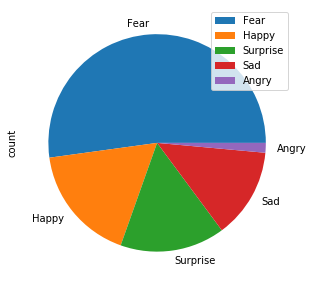

In [36]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
ax = plt.gca()
emotions.plot(kind='pie', y='count', ax=ax)
plt.legend(loc='upper right')

In [66]:
#Just a test -- don't rerun
data = data.iloc[:800]

In [202]:
data.shape

(2123, 14)

In [37]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'sub_id', 'id', 'author', 'selftext',
       'Topic', 'Category', 'Unnamed: 8', 'Unnamed: 9', 'emotions'],
      dtype='object')

In [38]:
data.author.nunique()

579

In [204]:
user_cat =  data[['author','Category']]
user_cat = user_cat[user_cat['author']!='None'] #drop those that don't have any user details
grouped_data_user = user_cat.groupby(['author','Category']).size().unstack().fillna(0)
grouped_data_user.loc[:,'Total'] = grouped_data_user.sum(axis=1)

In [231]:
grouped_data_user = grouped_data_user.sort_values(by='navigating enclusions and toxicity', ascending=False) #get some totals

KeyError: 'navigating enclusions and toxicity'

In [230]:
grouped_data_user.reset_index()

Category,author,Community building and preservation,Navigating exclusions and toxicity,Reflections on organizational policies and ethics,Resource development,Struggles of impression management,Survival tactics and empowerment,Total
0,_explanations,5.0,0.0,0.0,0.0,4.0,0.0,9.0
1,All_Is_Not_Self,1.0,0.0,2.0,0.0,4.0,2.0,9.0
2,thisissdk,1.0,0.0,0.0,0.0,3.0,3.0,7.0
3,zvalentia,1.0,0.0,0.0,2.0,3.0,2.0,8.0
4,confused_67,5.0,13.0,8.0,1.0,2.0,4.0,33.0
5,Shorty_bread,1.0,0.0,3.0,1.0,2.0,2.0,9.0
6,adadada3,0.0,0.0,1.0,0.0,2.0,1.0,4.0
7,vateeq,0.0,0.0,1.0,0.0,2.0,0.0,3.0
8,no_gaz,5.0,0.0,3.0,1.0,2.0,3.0,14.0
9,SobaatWork,0.0,1.0,2.0,0.0,2.0,1.0,6.0


In [224]:
grouped_data_user['Total'].sum()
grouped_data_user.to_csv("User_topic_categorization.csv")

In [223]:
#grouped_data_user.loc['Byeuji',:] #just checking for the most prominant actor (as per network visuals)
grouped_data_user.loc['_explanations',:]
#grouped_data_user.loc['SingShredCode',:]
grouped_data_user.loc['be_aware_16',:]

Category
Community building and preservation                  0.0
Navigating exclusions and toxicity                   1.0
Reflections on organizational policies and ethics    1.0
Resource development                                 4.0
Struggles of impression management                   0.0
Survival tactics and empowerment                     0.0
Total                                                6.0
Name: be_aware_16, dtype: float64

## Moving to user - emotion mapping!

In [49]:
emo_cat = data[['Category','emotions']]

In [50]:
grouped_data = emo_cat.groupby(['Category','emotions']).size().unstack()

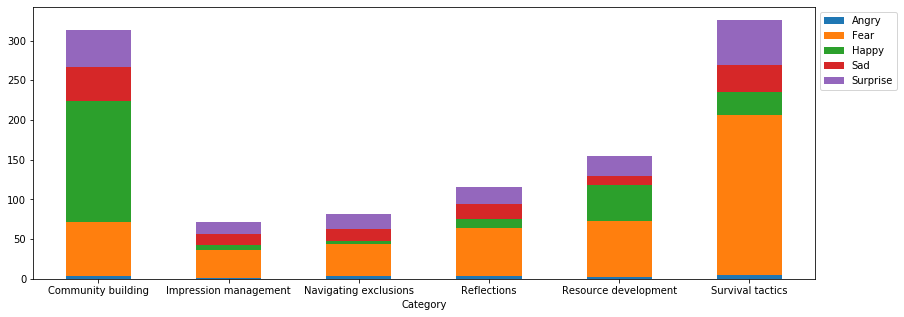

In [54]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,5))
ax = plt.gca()
grouped_data.plot(kind='bar', stacked='True', ax=ax)
plt.xticks(rotation=0, ha='center')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

